In [0]:
 !pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
from google.colab import drive #Google supported code snippet, mounting the Google drive to import the images
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Import Libraries**

In [3]:
import cv2
import os
import itertools

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix

from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Input, Dense, Flatten,Conv2D, ZeroPadding2D, MaxPooling2D, Dropout # Import hidden layer
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.optimizers import Adam #For Optimizing the Neural Network
from keras.applications.vgg16 import VGG16 # VGG16 saved model from keras
from keras import layers
from keras.layers import Input
from keras.models import Model
from keras.utils import to_categorical




Using TensorFlow backend.


In [4]:
#Checking dataset
paths = os.listdir(path="/content/gdrive/My Drive/chest_xray/")
print(paths)

['val', 'test', '.DS_Store', 'train']


In [0]:
#Path to all image data
train_path = "/content/gdrive/My Drive/chest_xray/train"
dev_path = "/content/gdrive/My Drive/chest_xray/val"
test_path = "/content/gdrive/My Drive/chest_xray/test"

In [0]:
#Getting all normal and pneumonia images from the folder
img_pne = glob(train_path+"/PNEUMONIA/*.jpeg")
img_norm = glob(train_path+"/NORMAL/*.jpeg")

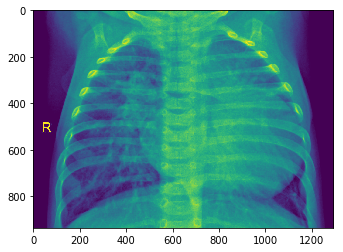

In [7]:
#First pnumonia image
img_pne_0 = np.asarray(plt.imread(img_pne[0]))
plt.imshow(img_pne_0)



In [8]:
# image shape
img_pne_0.shape

(936, 1292)

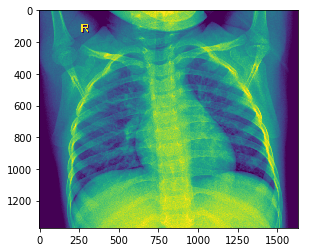

In [9]:
#First normal image
img_norm_0 = np.asarray(plt.imread(img_norm[0]))
plt.imshow(img_norm_0)

In [10]:
#image shape
img_norm_0.shape

(1372, 1634)

## Data pre-processing and Analysis

In [0]:
# Loading images
classes = ["NORMAL", "PNEUMONIA"]
data_gen = ImageDataGenerator(rescale=1./255) # No augmentation here but normalized

In [12]:
#flow_from_directory feature, re-size image 
train_batches = data_gen.flow_from_directory(train_path, target_size = (224, 224), classes = classes, class_mode='categorical',batch_size=16)
val_batches = data_gen.flow_from_directory(dev_path, target_size = (224, 224), classes = classes,class_mode='categorical',batch_size=1)
test_batches = data_gen.flow_from_directory(test_path, target_size = (224, 224), classes = classes,class_mode='categorical',batch_size=1)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
#chech re-sized image shape
X_input = train_batches.image_shape
X_input

(224, 224, 3)

In [14]:
train_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## First model using VGG16 template

In [15]:
#Transfer learning from a convolutional ANN model
#VGG16 model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 classes probability

W0729 01:54:01.137784 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 01:54:01.156157 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 01:54:01.164872 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 01:54:01.200454 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 01:54:01.426893 140386558637952 deprecation_wrapp

In [16]:
optimizer = Adam(lr = 0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0729 01:54:01.541979 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 01:54:01.554815 140386558637952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## First model fit

In [17]:

his = model.fit_generator(epochs=200,
                           shuffle=True,
                           validation_data=val_batches,
                           generator=train_batches,
                           steps_per_epoch=np.ceil(len(train_batches) / 16),
                           validation_steps=21,
                           verbose=1)

W0729 01:54:01.690350 140386558637952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
21/21 [==============================] - 128s 6s/step - loss: 0.6128 - acc: 0.7530 - val_loss: 0.9488 - val_acc: 0.4762
Epoch 2/200
21/21 [==============================] - 130s 6s/step - loss: 0.6381 - acc: 0.7738 - val_loss: 0.7625 - val_acc: 0.4762
Epoch 3/200
21/21 [==============================] - 127s 6s/step - loss: 0.5928 - acc: 0.7381 - val_loss: 0.7686 - val_acc: 0.5714
Epoch 4/200
21/21 [==============================] - 126s 6s/step - loss: 0.6165 - acc: 0.7232 - val_loss: 0.7833 - val_acc: 0.5238
Epoch 5/200
21/21 [==============================] - 132s 6s/step - loss: 0.5545 - acc: 0.7798 - val_loss: 0.8336 - val_acc: 0.4762
Epoch 6/200
21/21 [==============================] - 134s 6s/step - loss: 0.5896 - acc: 0.7500 - val_loss: 0.8157 - val_acc: 0.5238
Epoch 7/200
21/21 [==============================] - 133s 6s/step - loss: 0.5745 - acc: 0.7351 - val_loss: 0.7050 - val_acc: 0.4762
Epoch 8/200
21/21 [==============================] - 129s 6s/step - loss: 0.

In [0]:
#Source: helper_module.py by Sean Choi:
#https://github.com/sungsujaing/Happy_Dog_Detection/blob/master/helper_module.py

#A fuction to graph loss and accuracy from the fitting
def training_plot(hist,model_name):
    loss = [hist.history['loss'],hist.history['val_loss']]
    acc = [hist.history['acc'],hist.history['val_acc']]
    
    fig, axes = plt.subplots(1,2,figsize = (15,3))
    fig.suptitle(model_name)
    for ax,val,name in zip(axes,(loss,acc),['loss','accuracy']):
        ax.plot(val[0], color='b', label="Training")
        ax.plot(val[1], color='r', label="Validation")
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(name)

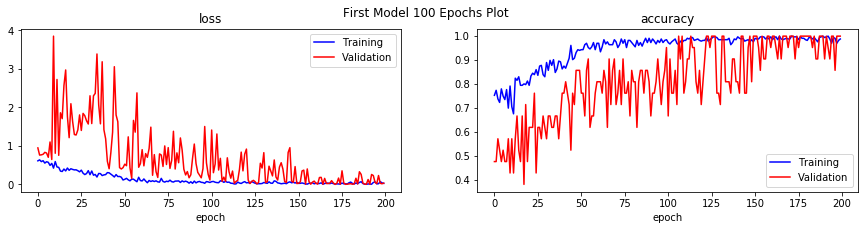

In [19]:
training_plot(his,'First Model 100 Epochs Plot')

In [20]:
#Fist model save
model.save('first_model_h1')
#First model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

### First model performance

In [21]:
test_generator1 = model.evaluate_generator(test_batches,steps=test_batches.samples)
print("Test: accuracy = %f  ;  loss = %f" % (test_generator1[1]*100, test_generator1[0]*100))
val_generator1 = model.evaluate_generator(val_batches,steps=val_batches.samples)
print("Validation: accuracy = %f  ;  loss = %f" % (val_generator1[1]*100, val_generator1[0]*100))

Test: accuracy = 73.397436  ;  loss = 214.499407
Validation: accuracy = 100.000000  ;  loss = 4.401473


## Prediction using the First model

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#Get the true labels
y_true = test_batches.labels
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
#Get the predicted labels
predict1 = model.predict_generator(test_batches,steps = test_batches.samples, verbose=0)
y_pred = np.argmax(predict1, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

Confusion matrix, without normalization


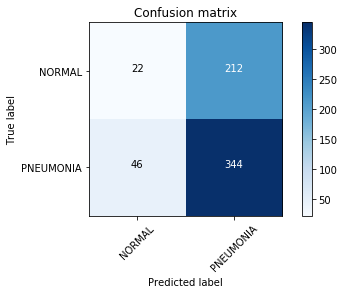

In [25]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm,classes, normalize=False)

## **Transfer learning from VGG16 - Fine tuning**




In [26]:
# Loading images
classes2 = ['NORMAL', 'PNEUMONIA']
data_gen2 = ImageDataGenerator(rescale=1./255) # No augmentation here but normalized

#flow_from_directory feature, re-size image 
train_batches2 = data_gen2.flow_from_directory(train_path, target_size = (224, 224), classes = classes2, class_mode = 'categorical',batch_size=16)
val_batches2 = data_gen2.flow_from_directory(dev_path, target_size = (224, 224), classes = classes2, class_mode = 'categorical',batch_size=1)
test_batches2 = data_gen2.flow_from_directory(test_path, target_size = (224, 224), classes = classes2, class_mode = 'categorical',batch_size=1)

#chech re-sized image shape
X_input1 = train_batches2.image_shape   #input from the same train batch with shape (224,224,3)


X_input1

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


(224, 224, 3)

In [27]:
X_input2 = Input(X_input1) #input from the same train batch with shape (224,224,3)

model_vgg16 = VGG16(include_top=False, weights='imagenet',input_tensor=X_input2)
last_layer = model_vgg16.get_layer('block5_pool').output
X2 = Flatten(name='flatten')(last_layer)
X2 = Dense(1024, activation='relu', name='fc1')(X2)
X2 = Dropout(0.7, name='dropout1')(X2)
X2 = Dense(512, activation='relu', name='fc2')(X2)
X2 = Dropout(0.5, name='dropout2')(X2)
X2 = Dense(2,activation='softmax',name='output')(X2) #same output of 2 and activation function is used
model_vgg16= Model(inputs = X_input2, outputs = X2)

58892288/58889256 [==============================] - 5s 0us/step


W0729 03:07:36.212614 140386558637952 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


###Freeze the pre-trined CNN weights

In [28]:
for layer in model_vgg16.layers[:-3]:
    layer.trainable = False
model_vgg16.compile(optimizer = optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


his2 = model_vgg16.fit_generator(epochs=200,shuffle=True, validation_data=val_batches2,
                           generator=train_batches2,
                           steps_per_epoch=np.ceil(len(train_batches) / 16),
                           validation_steps=21,
                           verbose=1)


Epoch 1/200
21/21 [==============================] - 8s 372ms/step - loss: 0.8892 - acc: 0.6488 - val_loss: 0.8912 - val_acc: 0.4762
Epoch 2/200
21/21 [==============================] - 5s 253ms/step - loss: 0.6972 - acc: 0.7083 - val_loss: 0.9721 - val_acc: 0.5238
Epoch 3/200
21/21 [==============================] - 6s 277ms/step - loss: 0.6327 - acc: 0.7292 - val_loss: 0.4570 - val_acc: 0.8095
Epoch 4/200
21/21 [==============================] - 6s 294ms/step - loss: 0.4974 - acc: 0.7768 - val_loss: 0.4615 - val_acc: 0.7619
Epoch 5/200
21/21 [==============================] - 6s 286ms/step - loss: 0.5982 - acc: 0.7351 - val_loss: 0.4606 - val_acc: 0.7143
Epoch 6/200
21/21 [==============================] - 6s 280ms/step - loss: 0.3912 - acc: 0.8244 - val_loss: 0.3386 - val_acc: 0.9048
Epoch 7/200
21/21 [==============================] - 6s 283ms/step - loss: 0.4116 - acc: 0.7708 - val_loss: 0.4205 - val_acc: 0.8095
Epoch 8/200
21/21 [==============================] - 6s 280ms/step - 

In [29]:
#Transfer-learning model summary
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#VGG16 model save
model_vgg16.save('model_vgg16_h1')

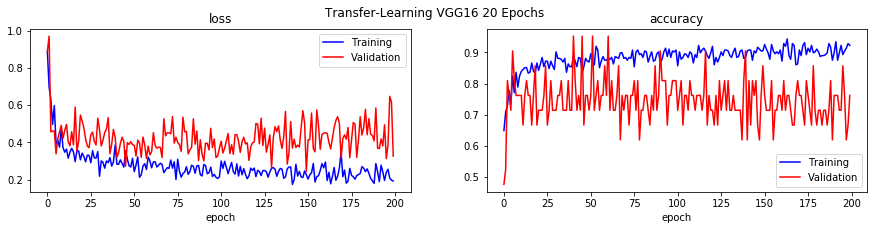

In [31]:
training_plot(his2, 'Transfer-Learning VGG16 20 Epochs')

## Transfer-Learning VGG16 Performace

In [32]:
test_generator2 = model_vgg16.evaluate_generator(test_batches2,steps=test_batches2.samples)
print("Test: accuracy = %f  ;  loss = %f" % (test_generator2[1]*100, test_generator2[0]*100))
val_generator2 = model_vgg16.evaluate_generator(val_batches2,steps=val_batches2.samples)
print("Validation: accuracy = %f  ;  loss = %f" % (val_generator2[1]*100, val_generator2[0]*100))

Test: accuracy = 82.852564  ;  loss = 37.293364
Validation: accuracy = 75.000000  ;  loss = 36.741426


## Prediction using the VGG16 pre-trained weights

In [33]:
predict2 = model_vgg16.predict_generator(test_batches2,steps = test_batches2.samples, verbose=1)
y_pred2 = np.argmax(predict2, axis=1)
y_pred2

624/624 [==============================] - 17s 27ms/step


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [34]:
y_true2 = test_batches2.labels
y_true2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Confusion matrix, without normalization


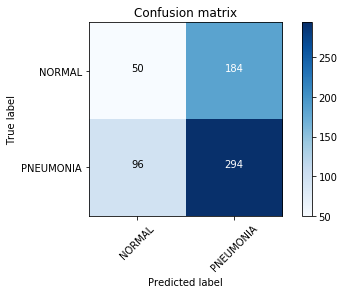

In [35]:
cm2 = confusion_matrix(y_true2, y_pred2)
plot_confusion_matrix(cm2,classes)

In [0]:
#Getting all normal and pneumonia test images from the folder
img_pne_test = glob(test_path+"/PNEUMONIA/*.jpeg")
img_norm_test = glob(test_path+"/NORMAL/*.jpeg")

img_test_all = img_pne_test[:]+img_norm_test[:]


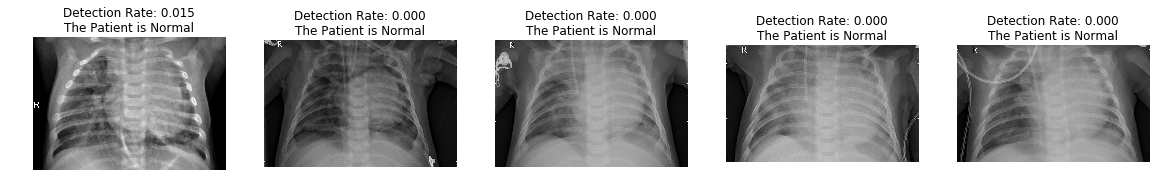

In [37]:
#First model detection
fig, axes = plt.subplots(1, 5, figsize = (4*5, 3*1))
for ax,img_num in zip(axes,img_test_all):
    img = cv2.imread(img_num)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(244,244)).astype('float32')
    img /= 255
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate1 = model.predict_generator(test_batches,test_batches.samples // test_batches.batch_size)[0][0]
    
    if predict_rate1 >= 0.5:
        predict_class = 'Pneumonia'
    else: predict_class = 'Normal'
    ax.set_title('Detection Rate: {:.3f}\nThe Patient is {}'.format(predict_rate1, predict_class))

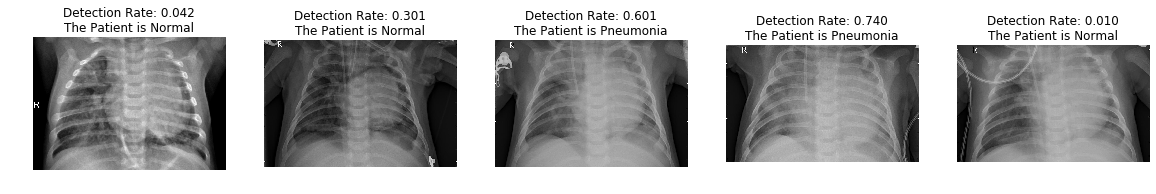

In [38]:
#VGG16 Transfer-Learning detection
fig, axes = plt.subplots(1, 5, figsize = (4*5, 3*1))
for ax,img_num in zip(axes,img_test_all):
    img = cv2.imread(img_num)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(244,244)).astype('float32')
    img /= 255
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate2 = model_vgg16.predict_generator(test_batches,test_batches.samples // test_batches.batch_size)[0][0]
    
    if predict_rate2 >= 0.5:
        predict_class = 'Pneumonia'
    else: predict_class = 'Normal'
    ax.set_title('Detection Rate: {:.3f}\nThe Patient is {}'.format(predict_rate2, predict_class))